In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [15]:
if os.getcwd().endswith('notebooks'):
    os.chdir('..')

print(f"Current folder : {os.getcwd()}")

Current folder : c:\Users\clemm\Documents\Personnal Projects\Automatic-soil-classification


In [16]:
sys.path.append(os.path.abspath('../'))
from src.preprocessing import ArealData
from src.experiments.train_kmeans import KMeansExperiment

In [18]:
# Load config to use the same parameters
with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print("Modules loaded successfully.")

Modules loaded successfully.


In [21]:
experiment = KMeansExperiment(config_path="config.yaml")
experiment.config = config

In [22]:
X_scaled = experiment.prepare_data()
print(f"Shape of x_scaled : {X_scaled.shape}")

print("Training...")
experiment.model.fit(X_scaled)
print("K-Means trained successfully !")

--- Extracting features from 27597 images ---
Shape of x_scaled : (1000000, 6)
Training...
K-Means trained successfully !


--- Result saved to results/kmeans_result.png ---


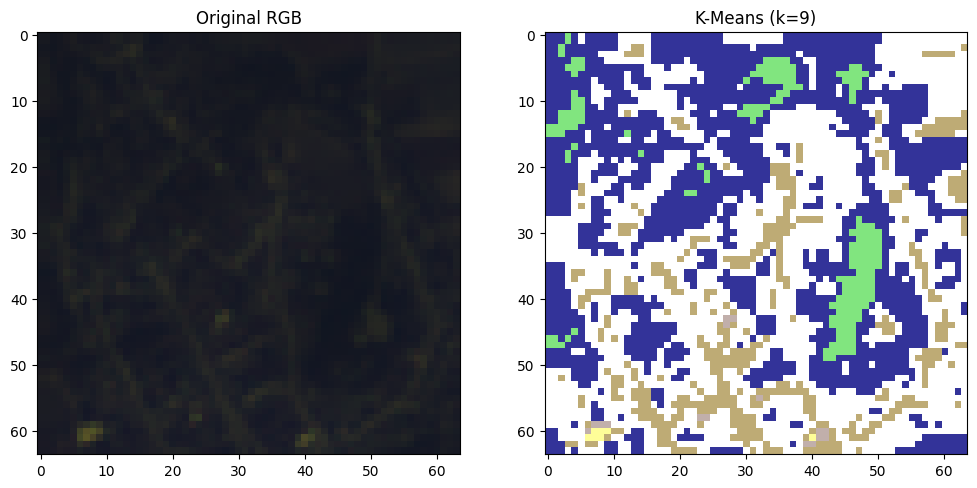

In [23]:
experiment.visualize_sample()

We did an unsupervised segmentation as was done in the initial project.

As a result from this K-Means implementation we can conclude that:
- The 13 bands are well read
- The spectral indices are working as they enable K-Means to create coherent clusters
- The CNN classification is feasible. Indeed if a simple K-Means already can extract structures a Deep Learning model could be efficient enough for a simple classification or segmentation task.